In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [35]:
import os

# Update the imgag variable with the correct path
imgag = r"C:\Users\prath\Downloads\Brain\BDT\BTDS"

# Check if the specified path exists
if os.path.exists(imgag):
    print("The specified path exists.")
else:
    print("The specified path does not exist.")

# Print information about each subfolder and its images
for expression in os.listdir(imgag):
    if not expression.startswith('.'):  # Filter out hidden files (optional)
        num_images = len(os.listdir(os.path.join(imgag, expression)))
        print(expression, "folder contains\t\t", num_images, 'images')


The specified path exists.
Brain Tumor folder contains		 2513 images
Healthy folder contains		 2087 images


In [36]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [37]:
Data_gen = ImageDataGenerator(rescale = 1.0/255,validation_split = 0.2)

In [38]:
train_set = Data_gen.flow_from_directory(imgag,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3681 images belonging to 2 classes.


In [39]:
test_set = Data_gen.flow_from_directory(imgag,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "rgb",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


In [40]:
train_labels = train_set.classes
test_labels = test_set.classes


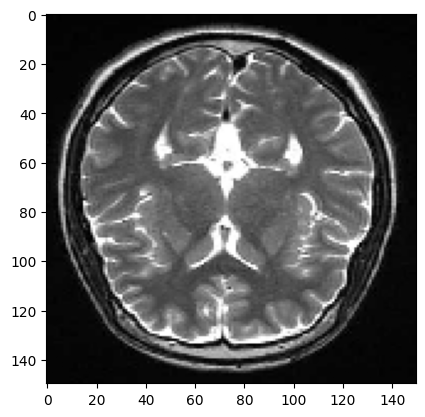

In [41]:
batch = next(train_set)

plt.imshow(batch[0][0])

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
resnet_model = Sequential()
model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(150,150,3),
                    pooling='max',classes=2,
                    weights='imagenet')
for layer in model.layers:
    layer.trainable=False
resnet_model.add(model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(256,activation='relu'))
resnet_model.add(Dense(128,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))

In [66]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_32 (Dense)            (None, 512)               1049088   
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 24801153 (94.61 MB)
Trainable params: 12

In [67]:
optimizer = tf.keras.optimizers.Adam()
resnet_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
epochs = 10
history = resnet_model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 484s 8s/step - loss: 0.6795 - accuracy: 0.6517 - val_loss: 0.8787 - val_accuracy: 0.5103
Epoch 2/10
58/58 [==============================] - 449s 8s/step - loss: 0.5740 - accuracy: 0.7115 - val_loss: 0.5564 - val_accuracy: 0.7399
Epoch 3/10
58/58 [==============================] - 451s 8s/step - loss: 0.4782 - accuracy: 0.7723 - val_loss: 0.4854 - val_accuracy: 0.7693
Epoch 4/10
58/58 [==============================] - 2718s 48s/step - loss: 0.4503 - accuracy: 0.7935 - val_loss: 0.4799 - val_accuracy: 0.7780
Epoch 5/10
58/58 [==============================] - 449s 8s/step - loss: 0.4270 - accuracy: 0.7973 - val_loss: 0.5231 - val_accuracy: 0.7399
Epoch 6/10
58/58 [==============================] - 453s 8s/step - loss: 0.3968 - accuracy: 0.8142 - val_loss: 0.3992 - val_accuracy: 0.8172
Epoch 7/10
58/58 [==============================] - 450s 8s/step - loss: 0.3421 - accuracy: 0.8422 - val_loss: 0.4524 - val_accuracy: 0.8063
Epoch 8/10


In [69]:
train_loss, train_acc = resnet_model.evaluate(train_set)
test_loss, test_acc   = resnet_model.evaluate(test_set)
train_loss, train_acc


15/15 [==============================] - 72s 5s/step - loss: 0.4272 - accuracy: 0.8063


(0.3775399923324585, 0.8315675258636475)

In [70]:
predictions =resnet_model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 59s 4s/step
0.7513966480446926


In [ ]:
plt.figure(figsize=(5, 3))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(5, 3))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [56]:
import tensorflow as tf
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import ResNet50
def build_resnet_model(hp):
    model = Sequential()
    r_model = ResNet50(include_top=False,
                          input_shape=(150, 150, 3),
                          pooling='max',
                          classes=2,
                          weights='imagenet')
    
    for layer in r_model.layers:
        layer.trainable = False
    model.add(r_model)
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units_1', min_value=128, max_value=1024, step=128, default=512), activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('dense_units_2', min_value=64, max_value=512, step=64, default=256), activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(units=hp.Int('dense_units_3', min_value=32, max_value=256, step=32, default=128), activation=hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
    
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [57]:
#initialize the tuner
tuner = RandomSearch(
        build_resnet_model,
        objective='val_accuracy',
        max_trials=5,
        directory='tuner_directory',
        project_name='resnet_tuner'
)

         

INFO:tensorflow:Reloading Tuner from tuner_directory\resnet_tuner\tuner0.json


In [58]:
tuner.search(train_set, epochs=5, validation_data=test_set)

INFO:tensorflow:Oracle triggered exit


In [59]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [60]:
best_model = build_resnet_model(best_hps)

In [61]:
best_model.compile(optimizer=best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
best_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
58/58 [==============================] - 503s 8s/step - loss: 0.7362 - accuracy: 0.5648 - val_loss: 0.6656 - val_accuracy: 0.5941
Epoch 2/10
58/58 [==============================] - 461s 8s/step - loss: 0.5687 - accuracy: 0.7188 - val_loss: 0.6122 - val_accuracy: 0.6746
Epoch 3/10
58/58 [==============================] - 412s 7s/step - loss: 0.5290 - accuracy: 0.7452 - val_loss: 0.5723 - val_accuracy: 0.7323
Epoch 4/10
58/58 [==============================] - 447s 8s/step - loss: 0.5048 - accuracy: 0.7612 - val_loss: 0.5689 - val_accuracy: 0.7138
Epoch 5/10
58/58 [==============================] - 357s 6s/step - loss: 0.4713 - accuracy: 0.7802 - val_loss: 0.5357 - val_accuracy: 0.7541
Epoch 6/10
58/58 [==============================] - 629s 11s/step - loss: 0.4167 - accuracy: 0.8117 - val_loss: 0.5000 - val_accuracy: 0.7519
Epoch 7/10
58/58 [==============================] - 1096s 19s/step - loss: 0.4193 - accuracy: 0.8060 - val_loss: 0.4418 - val_accuracy: 0.7824
Epoch 8/10

In [63]:
train_loss, train_acc = best_model.evaluate(train_set)
test_loss, test_acc   = best_model.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 93s 6s/step - loss: 0.3824 - accuracy: 0.8313


(0.38244694471359253, 0.8313384056091309)

In [64]:
predictions =best_model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 102s 6s/step
0.8252536640360767


In [71]:
#initialize the tuner
from keras_tuner.tuners import BayesianOptimization
bo_tuner = BayesianOptimization(
        build_resnet_model,
        objective='val_accuracy',
        max_trials=5,
        num_initial_points=2,
        directory='tuner_directory',
        project_name='bo_resnet_tuner'
)


INFO:tensorflow:Reloading Tuner from tuner_directory\bo_resnet_tuner\tuner0.json


In [72]:
bo_tuner.search(train_set, epochs=5, validation_data=test_set)

INFO:tensorflow:Oracle triggered exit


In [73]:
bo_best_hps = bo_tuner.get_best_hyperparameters(num_trials=1)[0]

In [74]:
bo_best_model = build_resnet_model(bo_best_hps)

In [75]:
bo_best_model.compile(optimizer=bo_best_hps.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
bo_best_model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
58/58 [==============================] - 315s 5s/step - loss: 0.6735 - accuracy: 0.5854 - val_loss: 0.6844 - val_accuracy: 0.5637
Epoch 2/10
58/58 [==============================] - 339s 6s/step - loss: 0.6441 - accuracy: 0.6447 - val_loss: 0.6513 - val_accuracy: 0.6453
Epoch 3/10
58/58 [==============================] - 290s 5s/step - loss: 0.6193 - accuracy: 0.6811 - val_loss: 0.6479 - val_accuracy: 0.6485
Epoch 4/10
58/58 [==============================] - 206s 4s/step - loss: 0.6094 - accuracy: 0.6832 - val_loss: 0.6226 - val_accuracy: 0.6268
Epoch 5/10
58/58 [==============================] - 271s 5s/step - loss: 0.6049 - accuracy: 0.6860 - val_loss: 0.6146 - val_accuracy: 0.6540
Epoch 6/10
58/58 [==============================] - 272s 5s/step - loss: 0.6046 - accuracy: 0.6843 - val_loss: 0.6119 - val_accuracy: 0.6529
Epoch 7/10
58/58 [==============================] - 349s 6s/step - loss: 0.5855 - accuracy: 0.6957 - val_loss: 0.6122 - val_accuracy: 0.6529
Epoch 8/10
58

In [78]:
train_loss, train_acc = bo_best_model.evaluate(train_set)
test_loss, test_acc   = bo_best_model.evaluate(test_set)
test_loss, test_acc

15/15 [==============================] - 74s 5s/step - loss: 0.5966 - accuracy: 0.6605


(0.5965719223022461, 0.6605005264282227)

In [79]:
predictions =bo_best_model.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 81s 5s/step
0.5958549222797926


In [ ]:
from keras_tuner.tuners import Hyperband

tuner = Hyperband(
    build_resnet_model,
    objective='val_accuracy',
    max_epochs=10,  # Maximum number of epochs for each configuration
    factor=3,  # Reduction factor for the number of trials in each bracket
    directory='tuner_directory',
    project_name='hyperband_resnet_tuner'
)

tuner.search(train_set, epochs=5, validation_data=test_set)

Trial 6 Complete [00h 24m 10s]
val_accuracy: 0.7279651761054993

Best val_accuracy So Far: 0.7410228252410889
Total elapsed time: 01h 58m 35s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
896               |512               |dense_units_1
sigmoid           |tanh              |activation_1
192               |256               |dense_units_2
tanh              |relu              |activation_2
64                |64                |dense_units_3
sigmoid           |relu              |activation_3
adam              |adam              |optimizer
0.0001333         |0.00012279        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
24/58 [===========>..................] - ETA: 1:05 - loss: 0.6704 - accuracy: 0.5866

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
resnet_model_H1 = Sequential()
model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(150,150,3),
                    pooling='max',classes=2,
                    weights='imagenet')
for layer in model.layers:
    layer.trainable=False
resnet_model_H1.add(model)
resnet_model_H1.add(Flatten())
resnet_model_H1.add(Dense(1024,activation='selu'))
resnet_model_H1.add(Dense(512,activation='selu'))
resnet_model_H1.add(Dense(128,activation='selu'))
resnet_model_H1.add(Dense(1,activation='sigmoid'))

In [15]:
optimizer = tf.keras.optimizers.Adagrad()
resnet_model_H1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
epochs = 10
history_1 = resnet_model_H1.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 7085s 124s/step - loss: 1.0405 - accuracy: 0.5585 - val_loss: 0.7864 - val_accuracy: 0.5375
Epoch 2/10
58/58 [==============================] - 1598s 27s/step - loss: 0.6059 - accuracy: 0.6811 - val_loss: 0.6211 - val_accuracy: 0.6605
Epoch 3/10
58/58 [==============================] - 727s 12s/step - loss: 0.6000 - accuracy: 0.6892 - val_loss: 0.5827 - val_accuracy: 0.6975
Epoch 4/10
58/58 [==============================] - 624s 11s/step - loss: 0.5620 - accuracy: 0.7264 - val_loss: 0.6113 - val_accuracy: 0.6746
Epoch 5/10
58/58 [==============================] - 597s 10s/step - loss: 0.5447 - accuracy: 0.7365 - val_loss: 0.5553 - val_accuracy: 0.6986
Epoch 6/10
58/58 [==============================] - 586s 10s/step - loss: 0.5522 - accuracy: 0.7207 - val_loss: 0.5538 - val_accuracy: 0.7160
Epoch 7/10
58/58 [==============================] - 595s 10s/step - loss: 0.5291 - accuracy: 0.7438 - val_loss: 0.5485 - val_accuracy: 0.7051
Epo

In [17]:
train_loss, train_acc = resnet_model_H1.evaluate(train_set)
test_loss, test_acc   = resnet_model_H1.evaluate(test_set)
train_loss, train_acc


15/15 [==============================] - 67720s 4836s/step - loss: 0.5297 - accuracy: 0.7443


(0.4720041751861572, 0.7965226769447327)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
resnet_model_H2 = Sequential()
model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(150,150,3),
                    pooling='max',classes=2,
                    weights='imagenet')
for layer in model.layers:
    layer.trainable=False
resnet_model_H2.add(model)
resnet_model_H2.add(Flatten())
resnet_model_H2.add(Dense(1024,activation='selu'))
resnet_model_H2.add(Dense(512,activation='selu'))
resnet_model_H2.add(Dense(128,activation='selu'))
resnet_model_H2.add(Dense(1,activation='sigmoid'))

In [19]:
optimizer = tf.keras.optimizers.Adam()
resnet_model_H2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
epochs = 10
history_2 = resnet_model_H2.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 594s 10s/step - loss: 1.2374 - accuracy: 0.6232 - val_loss: 0.6312 - val_accuracy: 0.6692
Epoch 2/10
58/58 [==============================] - 672s 12s/step - loss: 0.5209 - accuracy: 0.7465 - val_loss: 0.4920 - val_accuracy: 0.7595
Epoch 3/10
58/58 [==============================] - 572s 10s/step - loss: 0.5650 - accuracy: 0.7283 - val_loss: 0.4768 - val_accuracy: 0.7650
Epoch 4/10
58/58 [==============================] - 551s 10s/step - loss: 0.4436 - accuracy: 0.7881 - val_loss: 0.4565 - val_accuracy: 0.7639
Epoch 5/10
58/58 [==============================] - 546s 9s/step - loss: 0.4206 - accuracy: 0.8085 - val_loss: 0.4497 - val_accuracy: 0.7682
Epoch 6/10
58/58 [==============================] - 550s 9s/step - loss: 0.3667 - accuracy: 0.8289 - val_loss: 0.5470 - val_accuracy: 0.7584
Epoch 7/10
58/58 [==============================] - 320s 5s/step - loss: 0.3875 - accuracy: 0.8202 - val_loss: 0.3941 - val_accuracy: 0.8281
Epoch 8/1

In [21]:
train_loss, train_acc = resnet_model_H2.evaluate(train_set)
test_loss, test_acc   = resnet_model_H2.evaluate(test_set)
test_loss, test_acc


15/15 [==============================] - 46s 3s/step - loss: 0.4510 - accuracy: 0.8150


(0.4509909749031067, 0.8150163292884827)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
resnet_model_H3 = Sequential()
model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(150,150,3),
                    pooling='max',classes=2,
                    weights='imagenet')
for layer in model.layers:
    layer.trainable=False
resnet_model_H3.add(model)
resnet_model_H3.add(Flatten())
resnet_model_H3.add(Dense(1024,activation='selu'))
resnet_model_H3.add(Dense(512,activation='selu'))
resnet_model_H3.add(Dense(128,activation='relu'))
resnet_model_H3.add(Dense(1,activation='sigmoid'))

In [23]:
optimizer = tf.keras.optimizers.Adam()
resnet_model_H3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
epochs = 10
history_3 = resnet_model_H3.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 276s 5s/step - loss: 0.9594 - accuracy: 0.6107 - val_loss: 0.5832 - val_accuracy: 0.6953
Epoch 2/10
58/58 [==============================] - 313s 5s/step - loss: 0.5615 - accuracy: 0.7167 - val_loss: 0.5261 - val_accuracy: 0.7399
Epoch 3/10
58/58 [==============================] - 335s 6s/step - loss: 0.4770 - accuracy: 0.7729 - val_loss: 0.5029 - val_accuracy: 0.7617
Epoch 4/10
58/58 [==============================] - 409s 7s/step - loss: 0.4724 - accuracy: 0.7617 - val_loss: 0.4982 - val_accuracy: 0.7465
Epoch 5/10
58/58 [==============================] - 483s 8s/step - loss: 0.4060 - accuracy: 0.8115 - val_loss: 0.4043 - val_accuracy: 0.8161
Epoch 6/10
58/58 [==============================] - 451s 8s/step - loss: 0.3734 - accuracy: 0.8313 - val_loss: 0.4909 - val_accuracy: 0.7508
Epoch 7/10
58/58 [==============================] - 386s 7s/step - loss: 0.4013 - accuracy: 0.8098 - val_loss: 0.3898 - val_accuracy: 0.8161
Epoch 8/10
58

In [26]:
train_loss, train_acc = resnet_model_H3.evaluate(train_set)
test_loss, test_acc   = resnet_model_H3.evaluate(test_set)
test_loss, test_acc


15/15 [==============================] - 83s 5s/step - loss: 0.3873 - accuracy: 0.8205


(0.3873139023780823, 0.8204570412635803)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
resnet_model_H4 = Sequential()
model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(150,150,3),
                    pooling='max',classes=2,
                    weights='imagenet')
for layer in model.layers:
    layer.trainable=False
resnet_model_H4.add(model)
resnet_model_H4.add(Flatten())
resnet_model_H4.add(Dense(512,activation='tanh'))
resnet_model_H4.add(Dense(256,activation='relu'))
resnet_model_H4.add(Dense(64,activation='relu'))
resnet_model_H4.add(Dense(1,activation='sigmoid'))

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00012279)
resnet_model_H4.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
epochs = 10
history_4 = resnet_model_H4.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

Epoch 1/10
58/58 [==============================] - 512s 8s/step - loss: 0.5843 - accuracy: 0.6955 - val_loss: 0.5784 - val_accuracy: 0.6921
Epoch 2/10
58/58 [==============================] - 470s 8s/step - loss: 0.5075 - accuracy: 0.7588 - val_loss: 0.5347 - val_accuracy: 0.7116
Epoch 3/10
58/58 [==============================] - 461s 8s/step - loss: 0.4667 - accuracy: 0.7851 - val_loss: 0.4861 - val_accuracy: 0.7443
Epoch 4/10
58/58 [==============================] - 364s 6s/step - loss: 0.4391 - accuracy: 0.7922 - val_loss: 0.4645 - val_accuracy: 0.7476
Epoch 5/10
58/58 [==============================] - 340s 6s/step - loss: 0.3958 - accuracy: 0.8250 - val_loss: 0.4432 - val_accuracy: 0.7791
Epoch 6/10
58/58 [==============================] - 7618s 134s/step - loss: 0.3982 - accuracy: 0.8090 - val_loss: 0.4570 - val_accuracy: 0.7628
Epoch 7/10
58/58 [==============================] - 478s 8s/step - loss: 0.3555 - accuracy: 0.8449 - val_loss: 0.3863 - val_accuracy: 0.8270
Epoch 8/10

In [30]:
train_loss, train_acc = resnet_model_H4.evaluate(train_set)
test_loss, test_acc   = resnet_model_H4.evaluate(test_set)
test_loss, test_acc


15/15 [==============================] - 135s 9s/step - loss: 0.3615 - accuracy: 0.8422


(0.3614538609981537, 0.8422198295593262)

In [52]:
predictions =resnet_model_H4.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 108s 6s/step
0.8242424242424243


In [54]:
prediction =resnet_model_H3.predict(test_set)
predicted_labels = (prediction > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 92s 6s/step
0.8131370328425822


In [55]:
predictions =resnet_model_H2.predict(test_set)
predicted_labels = (predictions > 0.5).astype(int)
from sklearn.metrics import f1_score
f1 = f1_score(test_labels, predicted_labels)
print(f1)

15/15 [==============================] - 74s 5s/step
0.8168103448275863


In [80]:
bo_tuner.results_summary()

Results summary
Results in tuner_directory\bo_resnet_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
dense_units_1: 896
activation_1: sigmoid
dense_units_2: 448
activation_2: relu
dense_units_3: 96
activation_3: relu
optimizer: sgd
learning_rate: 0.007480757394409411
Score: 0.6430903077125549

Trial 0 summary
Hyperparameters:
dense_units_1: 512
activation_1: sigmoid
dense_units_2: 320
activation_2: sigmoid
dense_units_3: 224
activation_3: relu
optimizer: sgd
learning_rate: 0.0004827322539144281
Score: 0.5462459325790405

Trial 3 summary
Hyperparameters:
dense_units_1: 128
activation_1: sigmoid
dense_units_2: 128
activation_2: sigmoid
dense_units_3: 256
activation_3: sigmoid
optimizer: rmsprop
learning_rate: 0.00839595523771954
Score: 0.5462459325790405

Trial 4 summary
Hyperparameters:
dense_units_1: 1024
activation_1: sigmoid
dense_units_2: 64
activation_2: tanh
dense_units_3: 224
activation_3: sigmoid
optimizer: adam
lear

In [81]:
tuner.results_summary()

Results summary
Results in tuner_directory\resnet_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
dense_units_1: 640
activation_1: sigmoid
dense_units_2: 192
activation_2: tanh
dense_units_3: 96
activation_3: tanh
optimizer: adam
learning_rate: 0.001506636055482659
Score: 0.745375394821167

Trial 0 summary
Hyperparameters:
dense_units_1: 896
activation_1: relu
dense_units_2: 128
activation_2: tanh
dense_units_3: 256
activation_3: relu
optimizer: sgd
learning_rate: 0.007182110699690622
Score: 0.707290530204773

Trial 3 summary
Hyperparameters:
dense_units_1: 768
activation_1: relu
dense_units_2: 384
activation_2: relu
dense_units_3: 256
activation_3: relu
optimizer: sgd
learning_rate: 0.00024113662067982484
Score: 0.609358012676239

Trial 4 summary
Hyperparameters:
dense_units_1: 640
activation_1: relu
dense_units_2: 448
activation_2: relu
dense_units_3: 128
activation_3: sigmoid
optimizer: sgd
learning_rate: 0.0017870280424